In [3]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [21]:
from __future__ import division 
import os
import ds9
import pyfits
from astropy.coordinates import ICRS
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
from astropy.io import fits
d = ds9.ds9()
import aplpy

In [22]:
!ls ../../Data/Subaru_data/

G.cat               I.fits              R.fits              RGB_Subaru_2d.fits  p358Dust.fits
G.fits              I.fits.fz           R.fits.fz           R_cropped.fits
G.fits.fz           I_cropped.fits      R.shape             Rshape_processed.h5
G_cropped.fits      MACS1752.png        RGB.fits            crop_fits.md
I.cat               R.cat               RGB_Subaru.fits     crop_fits.sh


In [8]:
path = "../../Data/Subaru_data/"
fit_append = ["I", "R", "G"]
Hfits = [path + "{0}_cropped.fits".format(prefix) 
         for prefix in fit_append]

smaller range brighter in color

In [9]:
def visualize_fits_in_ds9(
    d, channel, this_fits, scale_low, scale_high, scale_method=None):
    """
    d = ds9 instance 
    channel = string - either "red", "green" or "blue" 
    this_fits = string - relative path to fits file 
    scale_method = string - "zscale" or "linear" etc. 
    scale_low = float - lower cut off for scale parameter 
    scale_high = float - upperer cut off for scale parameter 
    """
    d.set("rgb " + channel)
    fits = os.path.realpath(this_fits)
    d.set("file " + fits)
    if scale_method is not None:
        d.set("scale " + scale_method)
    d.set("scale limits {0} {1}".format(scale_low, scale_high))

# new frames

In [10]:
Hfits

['../../Data/Subaru_data/I_cropped.fits',
 '../../Data/Subaru_data/R_cropped.fits',
 '../../Data/Subaru_data/G_cropped.fits']

# new RGB frames

In [26]:
d = ds9.ds9()
d.set("frame delete all")
d.set("frame new rgb")

1

In [27]:
visualize_fits_in_ds9(d, "red", Hfits[0], -0.15, 250, scale_method="log")

In [28]:
visualize_fits_in_ds9(d, "green", Hfits[1], -0.15, 250, scale_method="log")

In [29]:
visualize_fits_in_ds9(d, "blue", Hfits[2], -0.15, 250, scale_method="log")

In [15]:
# d.set("wcs align yes")
d.set("zoom to fit")

1

# make RGB fits

In [19]:
path

'../../Data/Subaru_data/'

In [18]:
aplpy.make_rgb_cube(Hfits, path + 'RGB_Subaru.fits')

INFO:astropy:Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmpaN05BX


INFO: Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmpaN05BX [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmpBBnE2s


: Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmpBBnE2s [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmp8zbXtO


: Deleting work directory /var/folders/jn/vjpg99cj1tv00qwtp42ysq2w0000gn/T/tmp8zbXtO [montage_wrapper.wrappers]


RADECSYS is non-standard, use RADESYSa. [astropy.wcs.wcs]
RADECSYS is non-standard, use RADESYSa.
/Users/karenyng/Documents/Illustris_analysis/IEnv/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


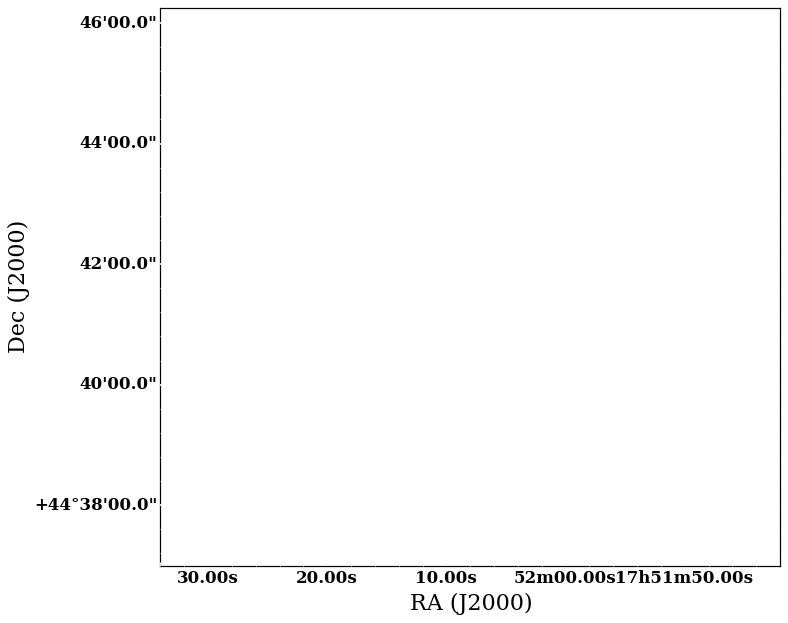

In [31]:
fig = aplpy.FITSFigure(Hfits[0])

In [33]:
fig.show_rgb(path + "RGB_Subaru.png")

ImportError: The Python Imaging Library (PIL) is required to read in RGB images